# ІМТР - частина 1.2
Петровського Андрія Анатолійовича (РТ-01ф)

#### 2. Виконати узгодження розмірностей величин в системі СІ (еВ, Дж, нм).
$  V = 0.2 еВ = 0.2 \cdot 1.602176565 \cdot 10^{-19} Дж = 3.20435313 \cdot 10^{-20} $
<br/>
$ V = 0.2 еВ = 0.2 \cdot 1.78266184 \cdot 10^{-36} = 3.5653236800000002 \cdot 10^{-37} $
<br/>
$ a = b = 2 нм = 2 \cdot 10^{-9} м $
<br/>


#### 3. На основі формул (1) - (5) розробити програму для аналізу залежностей коефіціентів відбиття та проходження квантово-механічних бар’єра та ями від енергії з побудовою графіків залежностей.

In [389]:
import math

import numpy as np
h = 6.62606957 * 10**-34
me = 9.10938291 * 10**-31
e = 1.602176565 * 10**-19
Vb = 0.2
Vy = -0.2
hh = h/(2*np.pi)
a = 2 * np.exp(-9)
Vdz = Vb * 1.602176565*10**-19
Vkg = Vb * 1.78266184 * 10**-36

Створимо функцію для знаходження нормованого імпедансу:
$$ Z = \sqrt{\frac{(E-V)m^{'}}{Em}} $$
Оскільки за умовою в нас $ m = m^{'} = m_{a,b} = m_{0} $, то вираз набуває вигляду:
$$ Z = \sqrt{\frac{(E-V)}{E}} $$
Запишемо його за допомогою функції Python:

In [390]:
def z(E,V):
    return np.sqrt((E-V)/E+0j)

Запишемо функцію для знаходження хвильового числа:
$$ k = \frac{\sqrt{2m(E-V)}}{ħ} $$
Опишемо за допомогою програмного коду:

In [391]:
def k(E,V):
    return np.sqrt(e*2*me*(E-V)+0j)/hh

Запишемо функцію для визначення тангенса фазової довжини неоднорідності згідно з умови:
$$ \varphi = kl = ka = kb = \frac{\sqrt{2m(E-V)}}{ħ}\cdot a = \frac{\sqrt{2m(E-V)}}{ħ}\cdot b $$


In [392]:
def tt(E,V):
    return np.tan(k(E,V) * a)

Задамо функцію для визначення нормованого вхідного імпедансу квантово-механічних бар’єра та ями, замінивши знак "+" на "-" згідно з вимогами
$$ z_{i} = \frac{1-iztg\varphi }{1-iz^{-1}tg\varphi} = \frac{1 - Z(E)tg(k(E)\cdot a))}{1 - Z(E)^{-1}tg(k(E)\cdot a))} $$

In [393]:
def zi(E,V):
    return complex(1,-z(E,V)*tt(E,V))/complex(1,-(z(E,V)**(-1)) * tt(E,V))

Також опишемо за допомогою коду функції для знаходження коефіцієнтів відбиття та проходження
$$ R = \frac{1-z_{i}}{1+z_{i}} $$
та <br/>
$$ T = \sqrt{1-\left | R \right |^{2}} $$


In [394]:
def R(E,V):
    return (1-zi(E,V))/(1+zi(E,V))

In [395]:
def T(E,V):
    return np.sqrt(1-abs(R(E,V))**2)

In [396]:
ff = np.arange(0.001,2,0.03)

In [397]:
Rvec = np.vectorize(R)
Tvec = np.vectorize(T)

In [398]:
Rvals = np.abs(Rvec(ff,Vb))
Tvals = Tvec(ff,Vb)

Ryvals = np.abs(Rvec(ff,Vy))
Tyvals = Tvec(ff,Vy)

Побудуємо графіки коефіцієнтів відбиття та проходження для барʼєру та ями

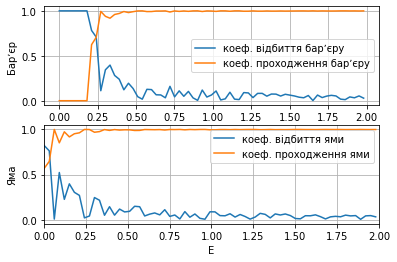

In [399]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(2)
# fig = plt.figure()
# ax = plt.subplot(111)
#
plt.grid(True)

ax1.plot(ff, Rvals, label='коеф. відбиття барʼєру')
ax1.plot(ff, Tvals, label='коеф. проходження барʼєру')
ax1.legend()
ax1.grid()
ax1.set_xlabel('E')
ax1.set_ylabel('Барʼєр')
ax2.plot(ff, Ryvals, label='коеф. відбиття ями')
ax2.plot(ff, Tyvals, label='коеф. проходження ями')
ax2.legend()
ax2.set_xlabel('E')
ax2.set_ylabel('Яма')
plt.grid(True)
plt.xlim(0,2)
plt.show()

**Висновок**
Як видно з графіка, що при нульовій енергії коефіцієнт відбиття барʼєру дорівнює 1, відповідно проходження – 0. Потім, починаючи з значення 0.2 коефіцієнт відбиття починає падати стрибкоподібною функцією і наближатися до 0. Коефіцієнт проходження, починаючи з 0.2 еВ починає зростати і наближається до 1. <br/>
На другому графіку видно залежності коефіцієнтів відбиття та проходження ями. При нульовій енергії модуль коефіцієнта відбиття ями дорівнює 0.82, а проходження - 0.57. Модуль коефіцієгта відбиття ями поступово пилкоподібно зростає та наближається до 1, відповідно коефіцієнт відбиття пилкоподібно спадає до 0.
Умовою резонансного проходження хвилі є $ E > 2V $

Запишемо функції для відображення графіків дійсної та уявної частини нормованого імпедансу:

In [400]:
def rezi(E,V):
    return np.real(zi(E,V))

def imzi(E,V):
    return np.imag(zi(E,V))

In [401]:
rezivec = np.vectorize(rezi)
imzivec = np.vectorize(imzi)

In [402]:
fff = np.arange(0.001,1,0.01)
rez_vals = rezivec(fff,Vb)
imz_vals = imzivec(fff,Vb)

rezy_vals = rezivec(fff, Vy)
imzy_vals = imzivec(fff, Vy)

Відобразимо графіки уявної та дійсної складових імпедансу для барʼєру та ями:

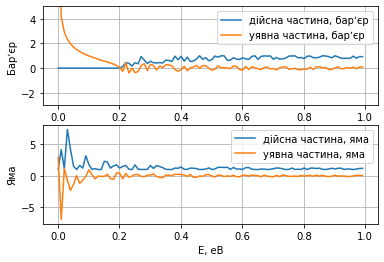

In [403]:
fig2, (ax3,ax4) = plt.subplots(2)
# ax1 = plt.subplot(111)
ax3.plot(fff, rez_vals ,label='дійсна частина, барʼєр')
ax3.plot(fff, imz_vals, label='уявна частина, барʼєр')
ax3.grid()
ax3.legend()
ax3.set_ylabel('Барʼєр')
ax3.set_ylim(-3,5)
ax4.plot(fff, rezy_vals, label='дійсна частина, яма')
ax4.plot(fff, imzy_vals, label='уявна частина, яма')
ax4.set_ylabel('Яма')
ax4.legend()
ax4.grid()
ax4.set_xlabel('E, eB')

plt.show()

На даних графіках видно, що для барʼєру в діапазоні 0..0.2 еВ дійсна частина імпедансу дорівнює 0, а уявна - спадає з нескінченності до 0. Далі в діапазоні $ 0.2:\infty  $ уявна частина барʼєру знаходиться біля нуля. В діапазоні 0.2:0.4 дійсна частина імпедансу зростає до 1 і далі знаходиться біля її рівня. Що задовольняє умові резонансного проходження хвилі, оскільки вхідний імпеданс дорівнює вхідному імпедансу середовища.
Для ями можна побачити, що дійсна частина імпедансу має в точці 0 значення *1.04*, далі стрибкоподібно досягає максимуму 7.37 в точці 0.03 далі спадає і наближається до 1. Уявна частина в точці 0 дорівнює 2.94, далі вона спадає до значення -6.9 в точці 0.011, згодом пилкоподібно наближається до 0

## Висновки
В даній роботі було побудовано модель замежевого хвилевода та проведено дослідження залежність коефіцієнта відбивання та проходження квантово-механічних барʼєру та ями. Було досліджено залежність коефіцієнта відбитя, коефіцієнта проходження, дійсної та уявної частини імпедансу квантово-механічних барʼєра та ями. Також слід зазначити, що на відмінну від попередньої моделі, тут є неперідичне чергування мінімумів та максимумів, які до того ж згасають.